Regression Problem

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=50, n_features=5)

In [5]:
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4
0,0.306205,1.439986,0.961077,1.378882,2.319060
1,1.063745,-0.109824,-0.634154,1.328887,0.058234
2,0.398598,1.036968,-0.315351,0.131207,0.400181
3,-0.807217,-0.962330,-1.349921,-0.086204,1.699056
4,-0.127871,0.443556,-0.039440,-0.391169,0.594959


In [7]:
y[:5]

array([4.08082499e+02, 4.57241817e+01, 1.34498551e+02, 2.57649057e-01,
       7.26928209e+01])

In [8]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest

In [9]:
fs = SelectKBest(score_func=mutual_info_regression, k=3)
fs.fit(X, y)

SelectKBest(k=3,
            score_func=<function mutual_info_regression at 0x00000180BCD7D080>)

In [10]:
fs.scores_

array([0.03497036, 0.42520941, 0.09556925, 0.        , 0.236068  ])

In [12]:
mi_score = pd.Series(fs.scores_, index=X.columns)
mi_score

0    0.034970
1    0.425209
2    0.095569
3    0.000000
4    0.236068
dtype: float64

<Axes: >

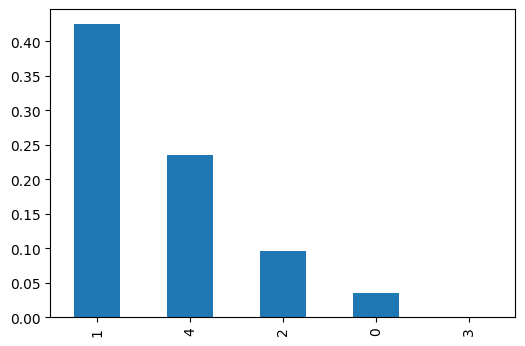

In [13]:
mi_score.sort_values(ascending=False).plot.bar(figsize=(6, 4))

In [14]:
X_selected = fs.fit_transform(X, y)
X_selected = pd.DataFrame(X_selected)

In [16]:
X.head()

,0,1,2,3,4
0,0.306205,1.439986,0.961077,1.378882,2.319060
1,1.063745,-0.109824,-0.634154,1.328887,0.058234
2,0.398598,1.036968,-0.315351,0.131207,0.400181
3,-0.807217,-0.962330,-1.349921,-0.086204,1.699056
4,-0.127871,0.443556,-0.039440,-0.391169,0.594959


In [17]:
X_selected.head()

,0,1,2
0,1.439986,0.961077,2.319060
1,-0.109824,-0.634154,0.058234
2,1.036968,-0.315351,0.400181
3,-0.962330,-1.349921,1.699056
4,0.443556,-0.039440,0.594959


Classification Problem

In [18]:
from sklearn.datasets import make_classification
from sklearn.feature_selection import mutual_info_classif

In [20]:
X, y = make_classification(n_samples=50, n_features=5, n_informative=2)
X = pd.DataFrame(X)

In [21]:
X.head()

,0,1,2,3,4
0,-1.202136,-0.352724,-2.463655,-1.294759,-0.812265
1,1.344522,1.339006,1.324699,0.011246,1.260956
2,1.482726,-0.056130,2.566063,1.122317,1.118293
3,-0.502361,-2.239673,-1.128587,-0.640539,-0.315036
4,-1.213193,1.894568,0.417285,1.609326,-1.535068


In [22]:
y[:5]

array([0, 1, 1, 0, 0])

<Axes: >

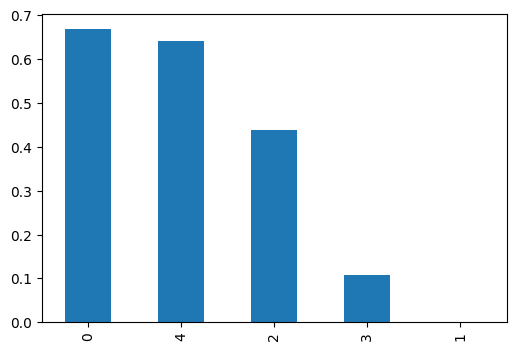

In [23]:
fs = SelectKBest(score_func=mutual_info_classif, k=3)
fs.fit(X, y)
mi_score = pd.Series(fs.scores_, index=X.columns)
mi_score.sort_values(ascending=False).plot.bar(figsize=(6, 4))

In [24]:
selected_X = fs.fit_transform(X, y)
selected_X = pd.DataFrame(selected_X)

In [26]:
X.head()

,0,1,2,3,4
0,-1.202136,-0.352724,-2.463655,-1.294759,-0.812265
1,1.344522,1.339006,1.324699,0.011246,1.260956
2,1.482726,-0.056130,2.566063,1.122317,1.118293
3,-0.502361,-2.239673,-1.128587,-0.640539,-0.315036
4,-1.213193,1.894568,0.417285,1.609326,-1.535068


In [27]:
selected_X.head()

,0,1,2
0,-1.202136,-2.463655,-0.812265
1,1.344522,1.324699,1.260956
2,1.482726,2.566063,1.118293
3,-0.502361,-1.128587,-0.315036
4,-1.213193,0.417285,-1.535068
